# Introduction to `ggplot` in Python with `plotnine`
The `ggplot` library in Python (via the `plotnine` package) is based on the grammar of graphics, popularized by R’s `ggplot2`. The idea behind the grammar of graphics is to build plots using layers. Each plot consists of data, aesthetic mappings (how data is represented visually), and geometric objects (what kind of plot we use).

This demo will guide you through the basics of using `ggplot` with the Iris dataset (fetched from `plotly`).

## Key Concepts in `ggplot`
- **`ggplot()`**: The main class for creating a plot.
- **`aes()` (aesthetic mappings)**: A function that maps data variables to visual properties, such as axes or colors.
- **`geom_*` (geometric objects)**: Functions that define the type of plot, such as scatter plots, lines, or bars.
- **`theme_*`**: Functions that control the plot's overall appearance (e.g., `theme_minimal()`, `theme_bw()`).
- **Faceting**: A way to create multiple plots, splitting the data by some categorical variable (e.g., `facet_wrap()`).

We will load the Iris dataset from the `plotly` library and use `plotnine` to create visualizations.


https://plotnine.org/

py -m pip install plotnine

In [1]:
# Import necessary libraries
import plotly.express as px
from plotnine import ggplot, aes, geom_point, geom_line, geom_bar, geom_boxplot, geom_density, theme_minimal, facet_wrap,theme_bw,theme_classic,theme_light,theme_matplotlib

# Load the Iris dataset from plotly
iris = px.data.iris()

# Display the first few rows of the dataset
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


## Basic Scatter Plot
A scatter plot is useful for visualizing relationships between two continuous variables. Here, we will plot the `sepal_length` against `sepal_width` for different species of iris flowers.


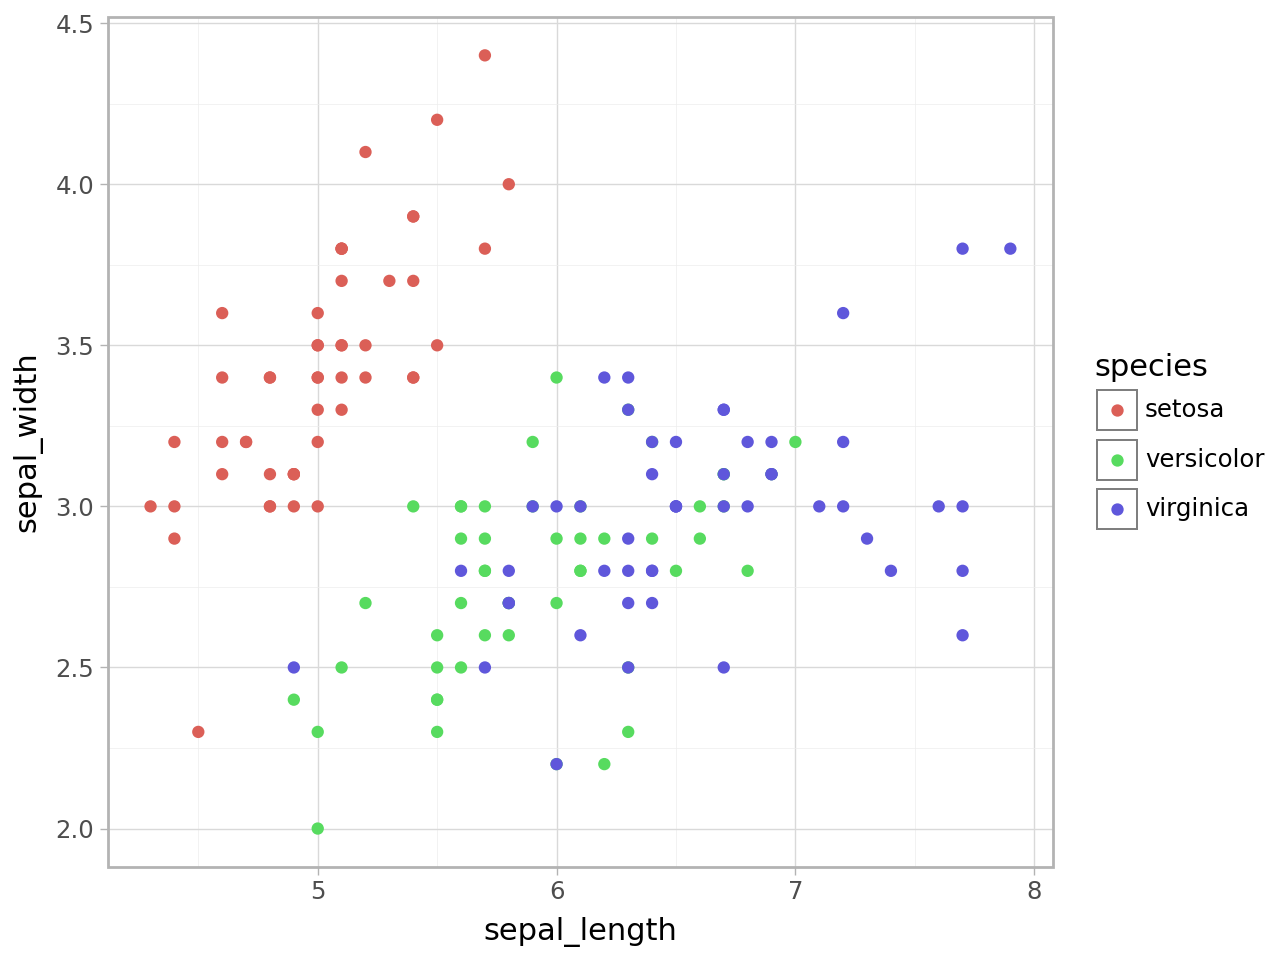

In [5]:
# Scatter plot: Sepal length vs Sepal width
ggplot(iris, aes(x='sepal_length', y='sepal_width', color='species')) +  geom_point()  +  theme_light()


## Line Plot
Line plots are generally used for time series or ordered data. In the case of the Iris dataset, we will compute the mean of `sepal_length` for each species and display it as a line plot.


      species  sepal_length  sepal_width  petal_length  petal_width  \
0      setosa         5.006        3.418         1.464        0.244   
1  versicolor         5.936        2.770         4.260        1.326   
2   virginica         6.588        2.974         5.552        2.026   

   species_id  
0         1.0  
1         2.0  
2         3.0  


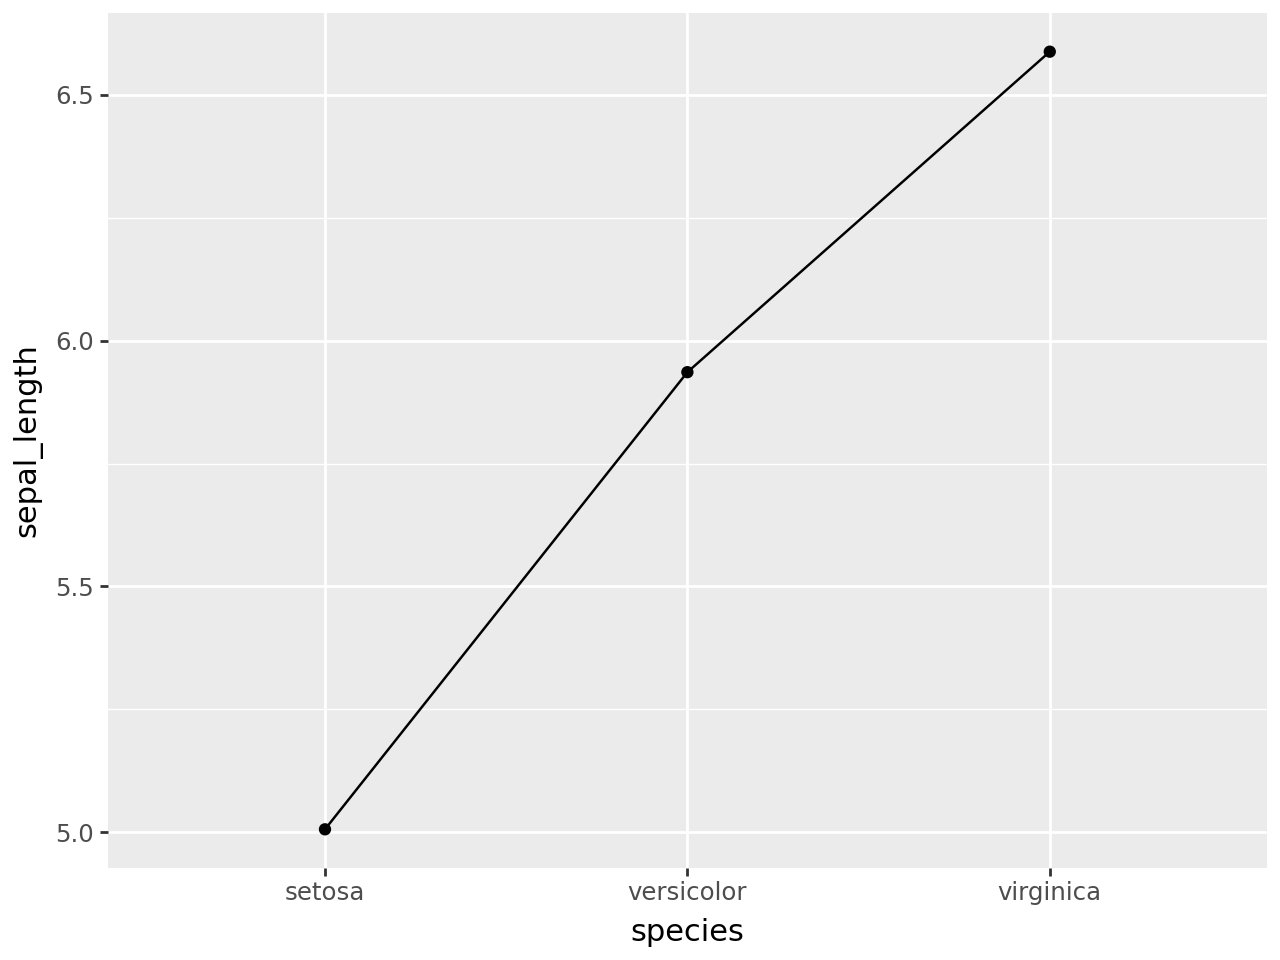

In [6]:
# Create a DataFrame with the mean of each species
iris_mean = iris.groupby('species').mean().reset_index()
print(iris_mean)

# Line plot: Mean sepal length across species
ggplot(iris_mean, aes(x='species', y='sepal_length'))  + geom_point() +geom_line(aes(x='species', y='sepal_length',group=1))



## Bar Plot
Bar plots are useful for comparing categorical data. Here, we will plot the mean of `petal_width` for each species as a bar plot.


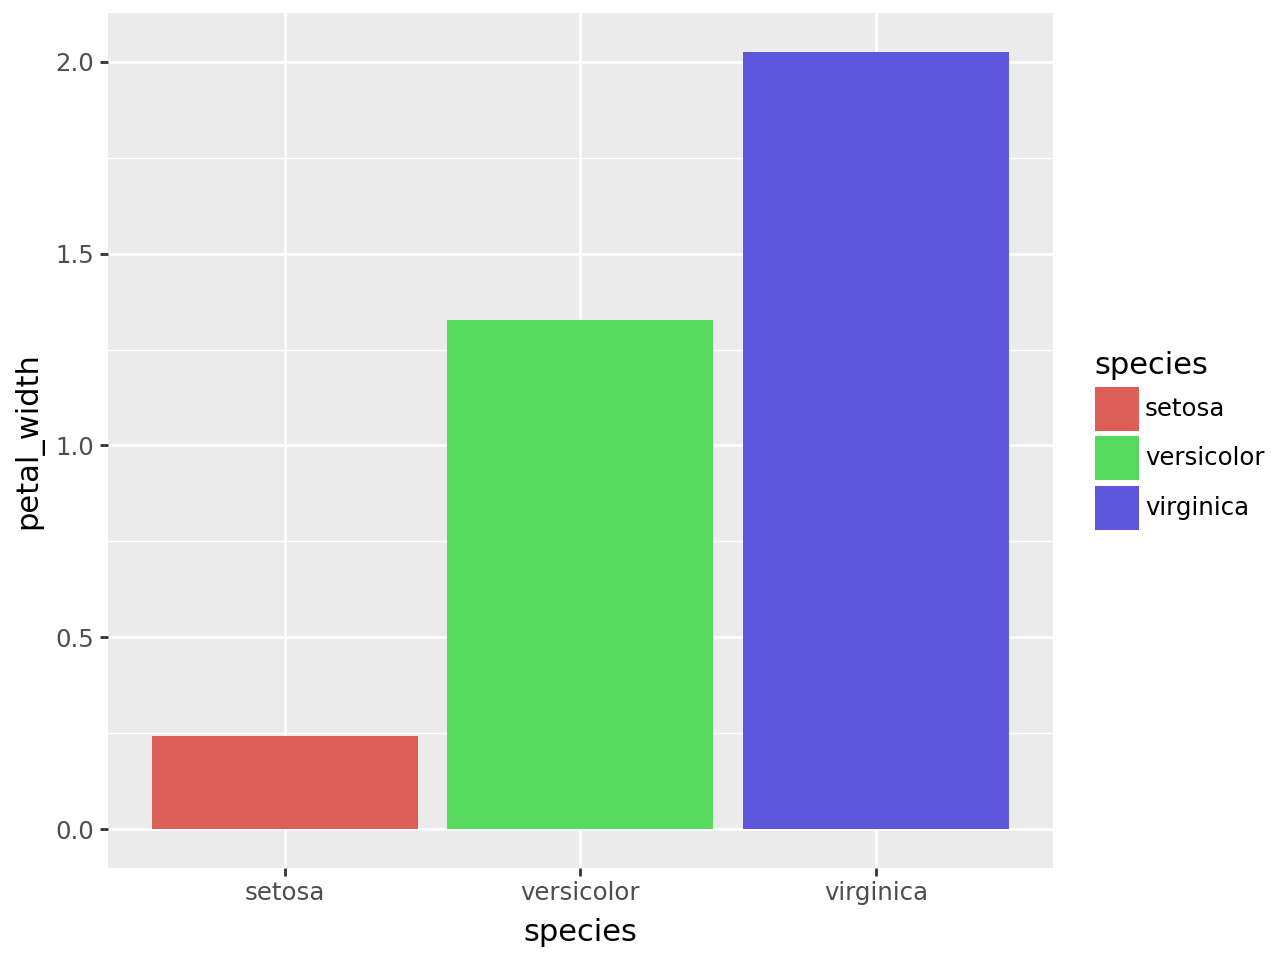

In [7]:
# Bar plot: Mean petal width across species
ggplot(iris_mean, aes(x='species', y='petal_width', fill='species')) + geom_bar(stat='identity') 


## Faceting
Faceting allows you to create small multiples of plots for different subsets of data. It splits your dataset based on a variable, so you can visualize each subset separately. In this example, we'll create a scatter plot of `sepal_length` vs `sepal_width` and facet the plot by the species of iris.


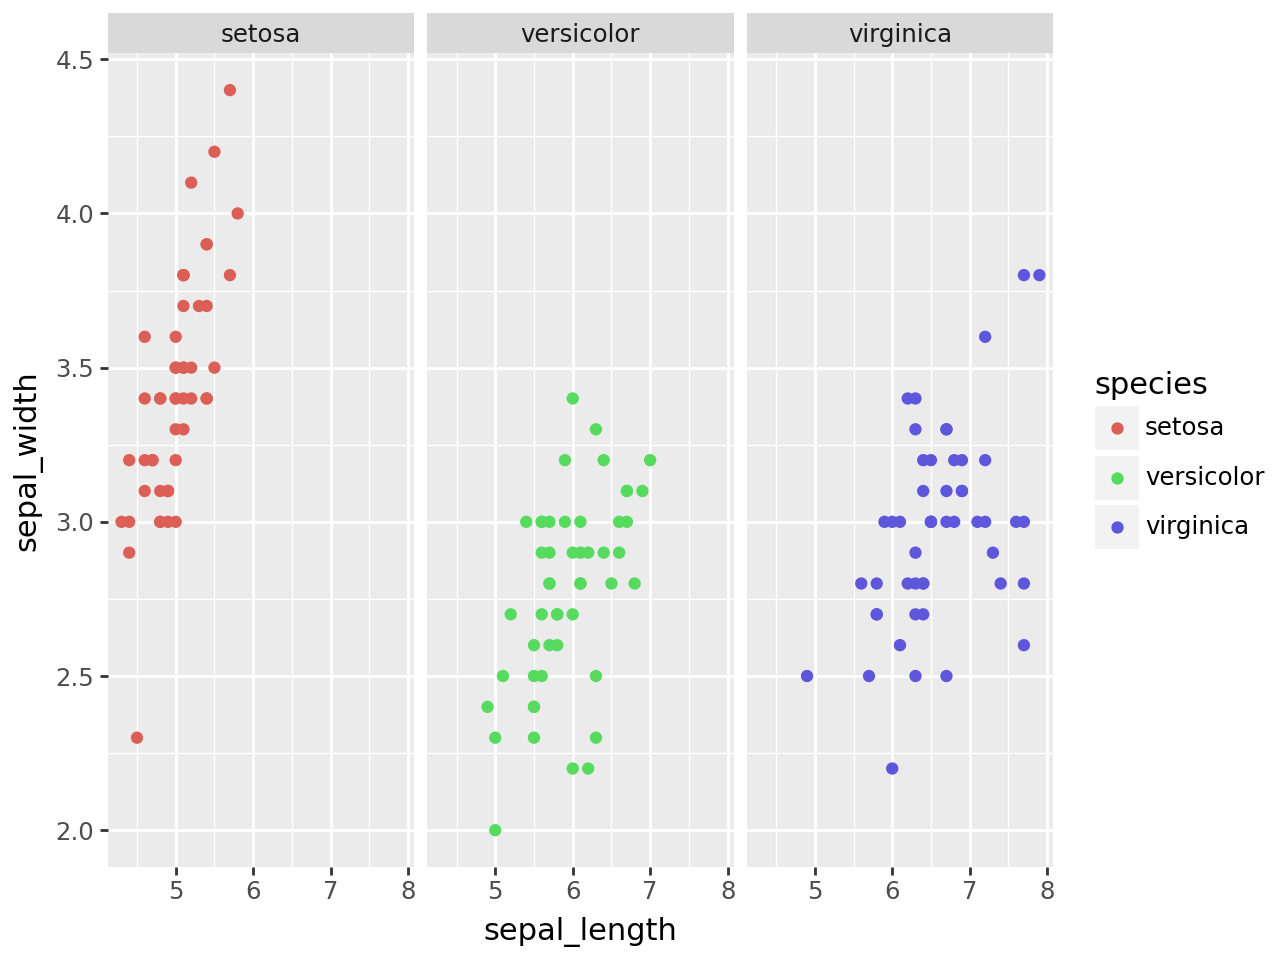

In [35]:
# Faceting: Scatter plot for each species
ggplot(iris, aes(x='sepal_length', y='sepal_width', color='species')) + geom_point() +  facet_wrap('~species') 


## Additional Plot Examples with White Theme
We will now explore a few more types of plots and apply a white background using `theme_light()` or `theme_classic()`. These themes offer a clean, white background for better readability.

We'll explore:
1. **Box Plot**: To show the distribution of sepal lengths across species.
2. **Density Plot**: To visualize the distribution of petal lengths for different species.
3. **Violin Plot**: To combine a box plot and density plot in one visualization.


 Box Plot with theme_light()
A box plot shows the distribution of data based on five summary statistics: minimum, first quartile, median, third quartile, and maximum.

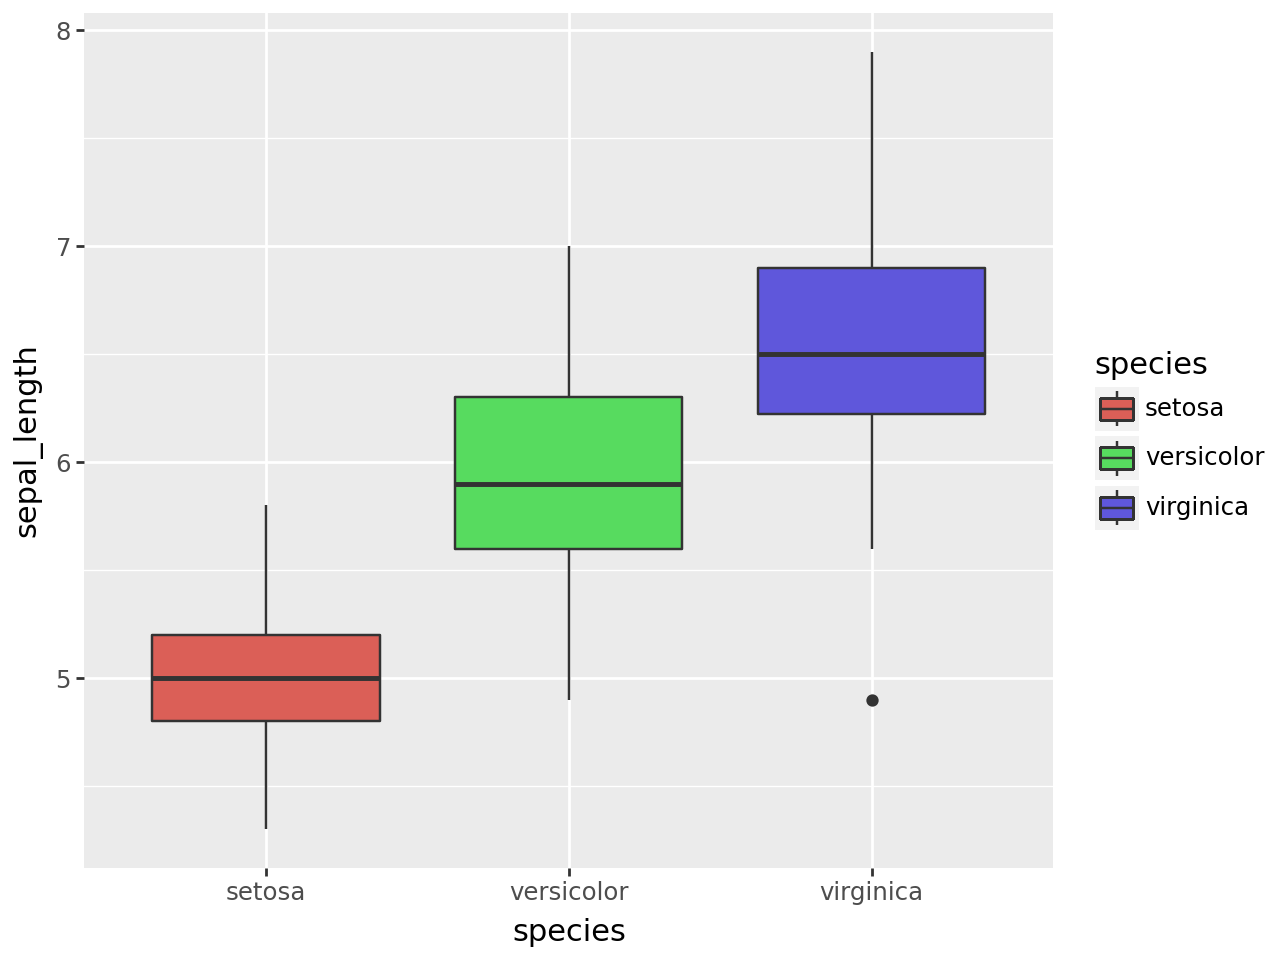

In [9]:
# Box plot: Sepal length distribution for each species
ggplot(iris, aes(x='species', y='sepal_length', fill='species')) +  geom_boxplot() 

Density Plot
A density plot visualizes the distribution of a continuous variable using kernel density estimation. Here, we’ll look at the distribution of petal_length for each species.

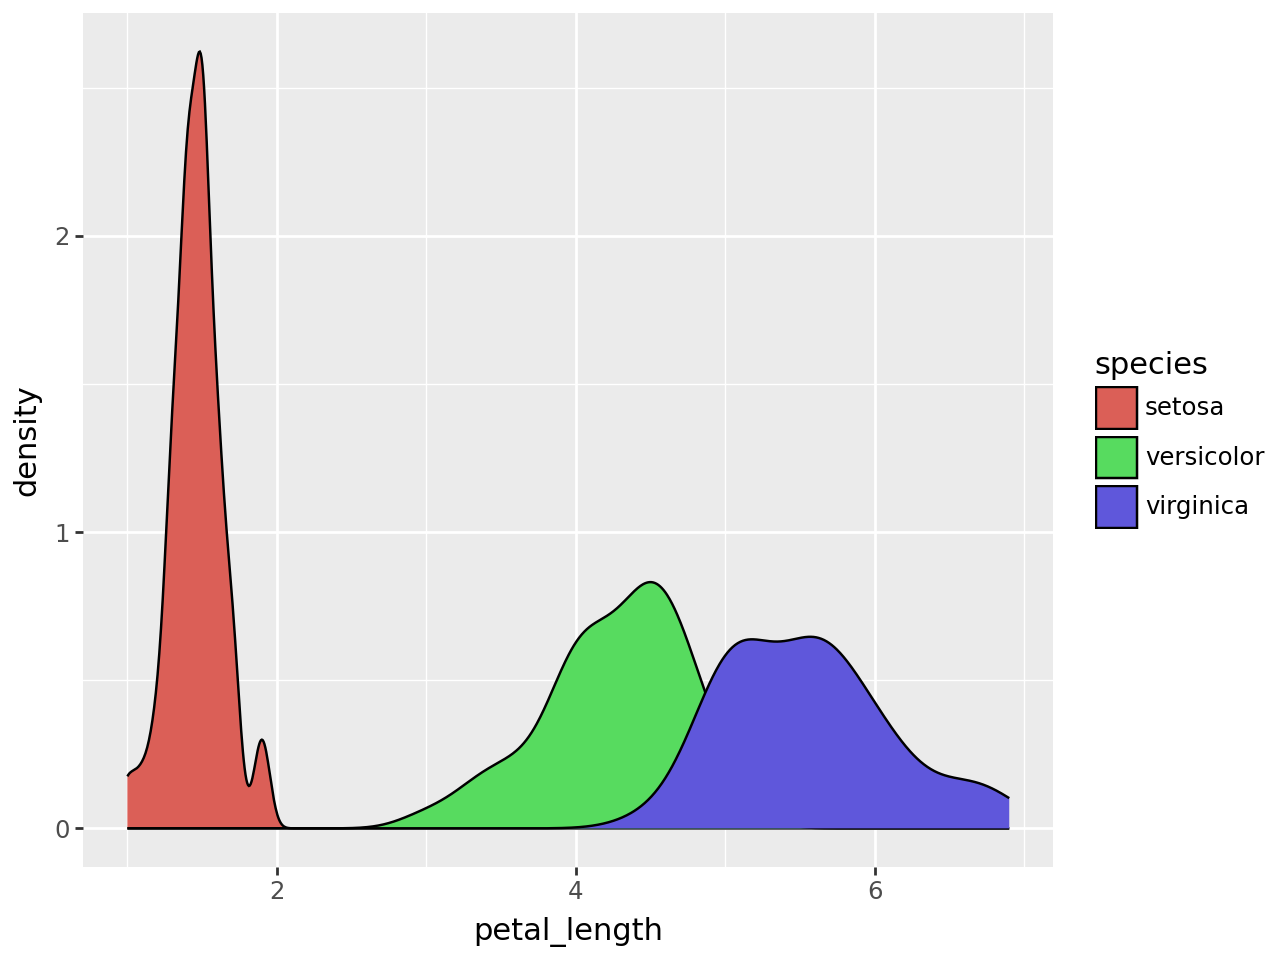

In [14]:
# Density plot: Petal length distribution for each species
ggplot(iris, aes(x='petal_length', fill='species')) +  geom_density(alpha=1)  # alpha for transparency


 A violin plot combines aspects of a box plot and a density plot. It shows the distribution of data and provides more insight into the underlying distribution.

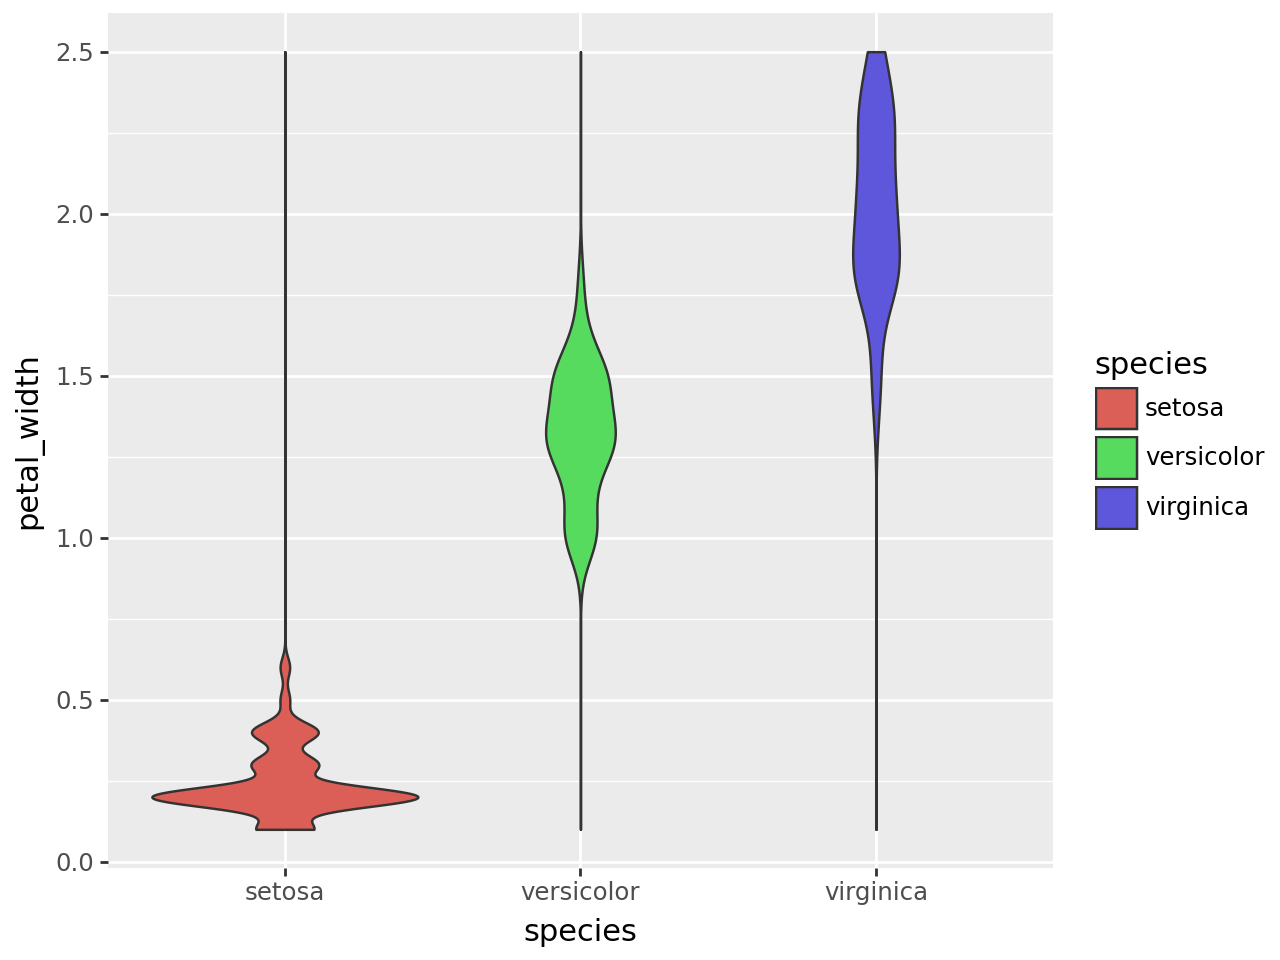

In [11]:
from plotnine import geom_violin

# Violin plot: Petal width distribution for each species
ggplot(iris, aes(x='species', y='petal_width', fill='species')) +  geom_violin(trim=False)  # `trim=False` ensures tails are not cut off


## Conclusion
This demo has covered the basics of creating plots using the `ggplot` system in Python with the `plotnine` package. We explored how to:
- Create a scatter plot with aesthetic mappings.
- Make a line plot and bar plot based on summary statistics.
- Use faceting to split data into multiple subplots.

The `ggplot` system is highly flexible and can be further extended with additional layers and customizations. You can add more `geom_*` layers to your plots, change themes, and modify aesthetic mappings to explore your data in new ways.
